<div class="alert alert-block alert-info">

----------
---------
# <b> 1. Imports</b> 

--------------
----------------
</div>

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os
import glob


<div class="alert alert-block alert-info">

----------
---------
# <b> 2. Defining Paths</b> 

--------------
----------------
</div>

In [ ]:
MODEL_PATH = "/home/javid/corrosion_detector_part2/runs/yolov8n_corrosion/weights/best.pt"
DATA_YAML = "/home/javid/corrosion_detector_part2/dataset/data.yaml"
RUNS_DIR = "/home/javid/corrosion_detector_part2/runs"
TEST_IMAGES = "/home/javid/corrosion_detector_part2/dataset/images/test"
PRED_DIR = os.path.join(RUNS_DIR, "test_predictions")

<div class="alert alert-block alert-info">

----------
---------
# <b> 3. Loading the trained YOLOv8 model</b> 

--------------
----------------
</div>

In [ ]:
model = YOLO(MODEL_PATH)

<div class="alert alert-block alert-info">

----------
---------
# <b> 4. Evaluating the model on the test dataset</b> 

--------------
----------------
</div>

In [ ]:
metrics = model.val(data=DATA_YAML)

print("\nValidation metrics:")
for k, v in metrics.results_dict.items():
    print(f"{k:20}: {v}")


<div class="alert alert-block alert-info">

----------
---------
# <b> 5. Running inference on test images and saving predictions</b> 

--------------
----------------
</div>

In [ ]:
results = model.predict(
    source=TEST_IMAGES,
    project=RUNS_DIR,
    name="test_predictions",
    save=True,
    imgsz=640,
    conf=0.25
)
print(f"\n Predictions saved to: {PRED_DIR}")



<div class="alert alert-block alert-info">

----------
---------
# <b> 6.Visualizing selected prediction results</b> 

--------------
----------------
</div>

✅ Best model loaded successfully!
Ultralytics 8.3.226 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 14916MiB)


Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3026.0±1805.3 MB/s, size: 764.6 KB)
val: Scanning /home/javid/corrosion_detector_part2/dataset/labels/val.cache... 81 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 81/81 94.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.2it/s 5.1s0.4ss
                   all         81       1841      0.395      0.285      0.254      0.119
Speed: 2.0ms preprocess, 4.5ms inference, 0.0ms loss, 41.7ms postprocess per image
Results saved to /home/javid/corrosion_detector_part2/scripts/runs/detect/val

📊 Validation metrics:
metrics/precision(B): 0.39519178109846365
metrics/recall(B)   : 0.2846279196089082
metrics/mAP50(B)    : 0.2538351424512061
metrics/mAP50-95(B) : 0.11898489553510719
fitness             : 0.11898489553510719

image 1/83 /home/javid/corrosion_detector_part2/dataset/images/test

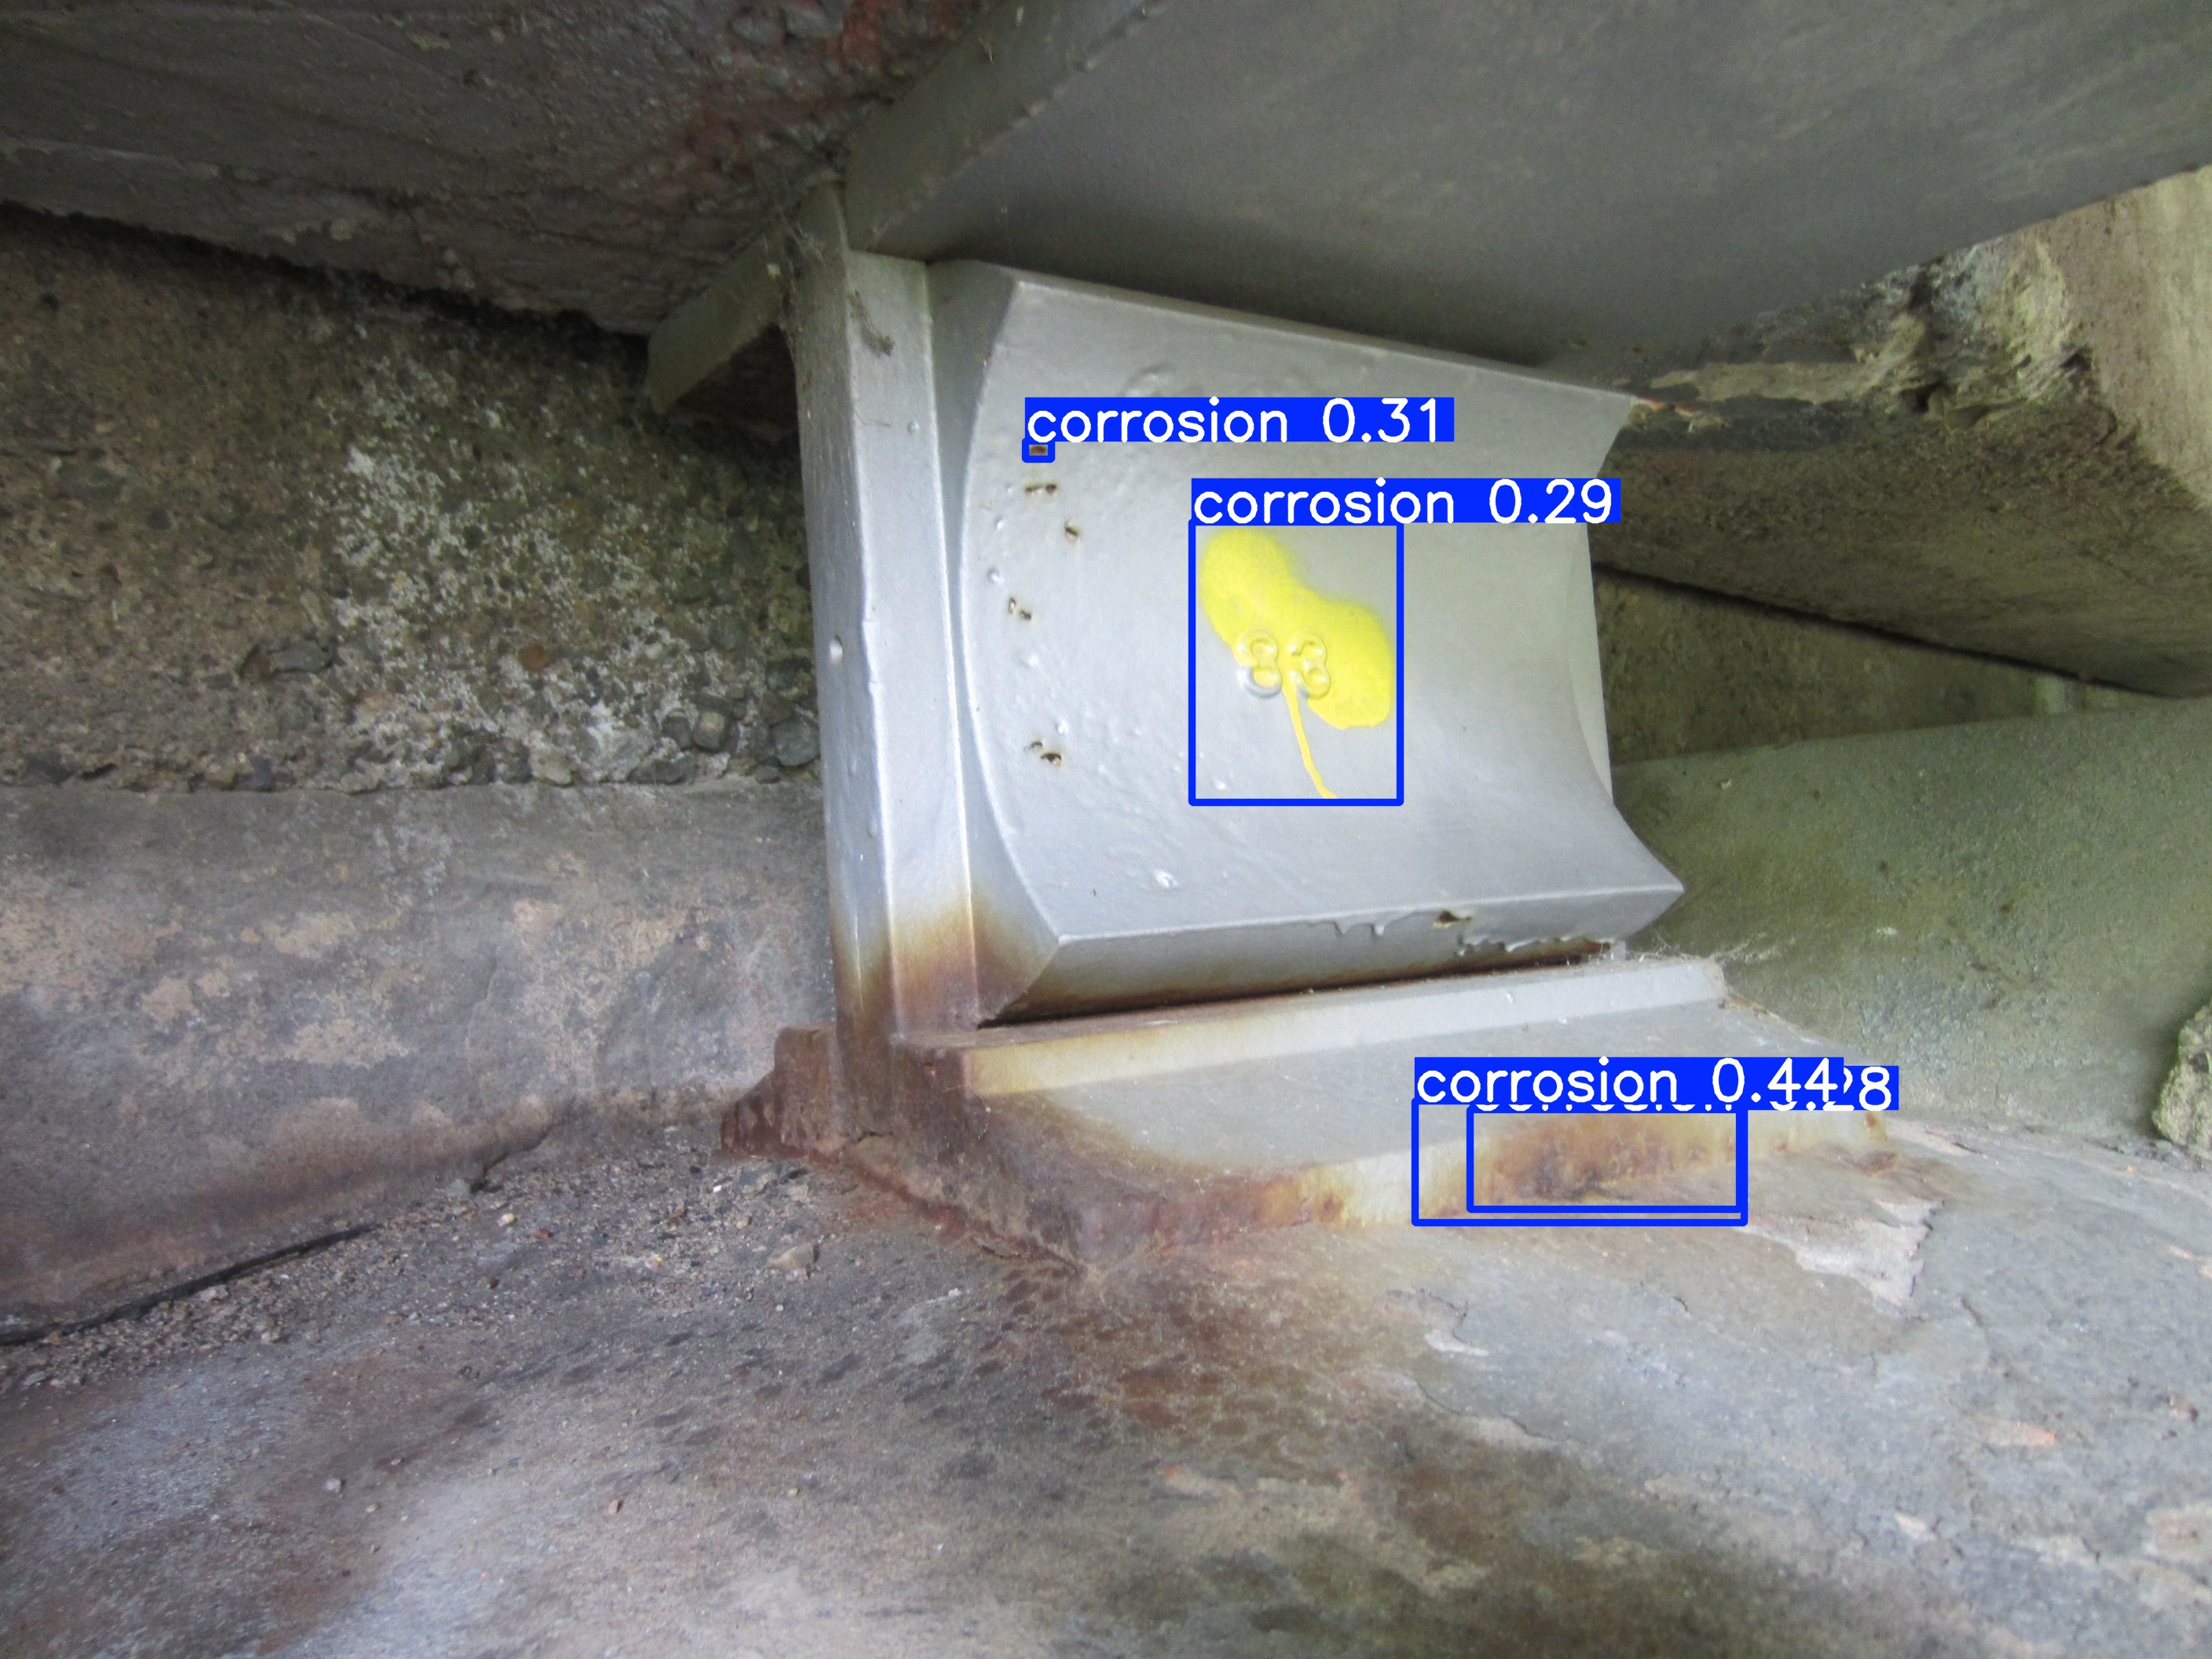

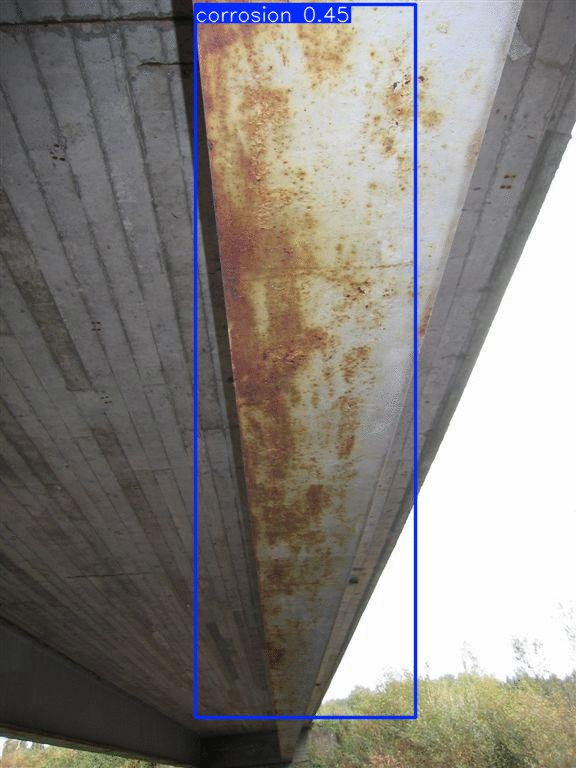

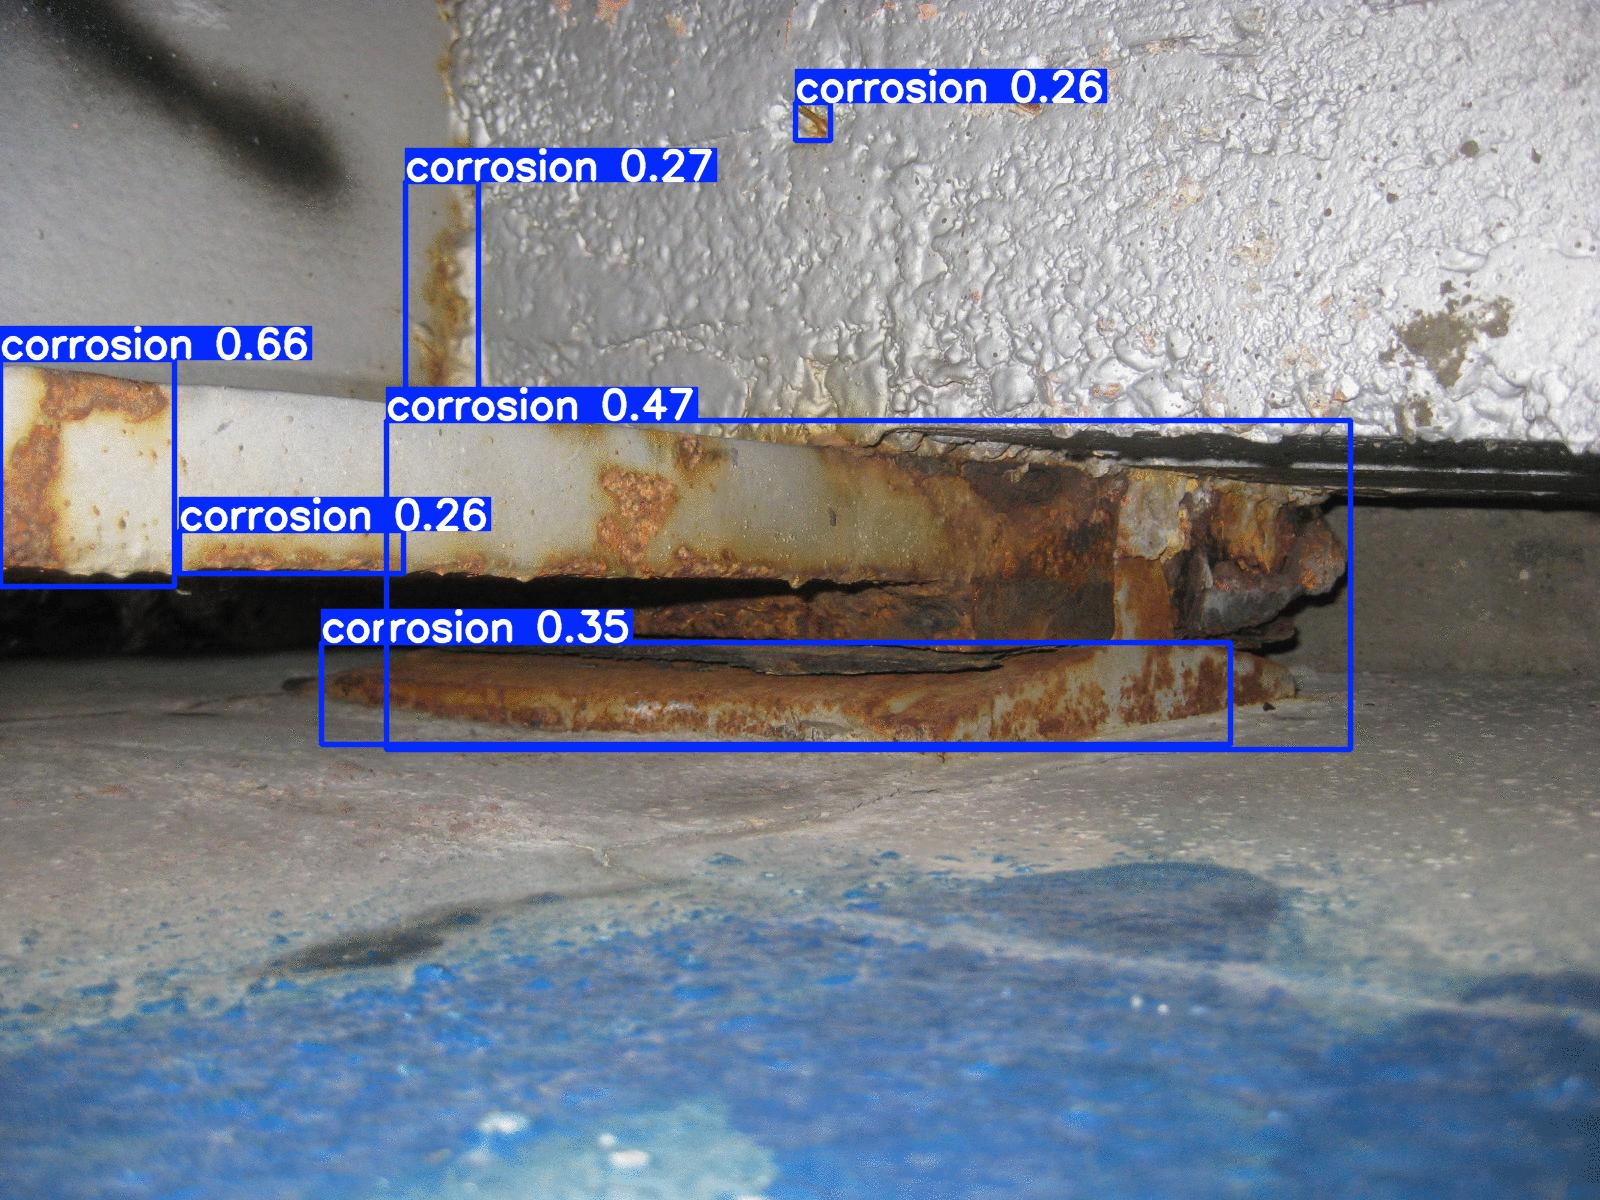

In [ ]:
pred_images = glob.glob(os.path.join(PRED_DIR, "*.jpg"))
print(f"Found {len(pred_images)} predicted images")

for img_path in pred_images[:3]:
    display(Image(filename=img_path))
